In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import os
import pandas as pd

In [2]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/features")
files = os.listdir()

In [3]:
dataframes_list = []

In [4]:
for file in files:
  df = pd.read_excel(file)
  df = df.rename(columns={df.columns[0]:'Year_'+str(file[:5]), df.columns[1]:'Value_'+str(file[:5])})
  dataframes_list.append(df)

In [5]:
type(dataframes_list[0])

pandas.core.frame.DataFrame

In [6]:
print(dataframes_list[0].shape)
print(dataframes_list[1].shape)
print(dataframes_list[2].shape)
print(dataframes_list[3].shape)
print(dataframes_list[4].shape)
print(dataframes_list[5].shape)
print(dataframes_list[6].shape)
print(dataframes_list[7].shape)
print(dataframes_list[8].shape)

(413, 2)
(413, 2)
(136, 2)
(413, 2)
(413, 2)
(413, 2)
(413, 2)
(136, 2)
(136, 2)


In [8]:
files

['price.xls',
 'mortage_interest.xls',
 'missing_mortages.xls',
 'job_growth.xls',
 'inventory.xls',
 'demographics.xls',
 'credit_availability.xls',
 'forbearance.xls',
 'government_influence.xls']

Now we have all the datas on seperate data frames, we are going to merge them to create a proper dataframe that consists of all data. We start by merging those data frames with same number of rows.

We merge all the data frames that has 413 rows.

In [7]:
new_data =  pd.merge(dataframes_list[0],dataframes_list[1],  how='left', left_on = dataframes_list[0].columns[0], right_on = dataframes_list[1].columns[0])
new_data.drop(dataframes_list[1].columns[0],inplace=True,axis=1)

In [8]:
new_data =  pd.merge(new_data,dataframes_list[3],  how='left', left_on = dataframes_list[0].columns[0], right_on = dataframes_list[3].columns[0])
new_data.drop(dataframes_list[3].columns[0],inplace=True,axis=1)

In [9]:
new_data =  pd.merge(new_data,dataframes_list[4],  how='left', left_on = dataframes_list[0].columns[0], right_on = dataframes_list[4].columns[0])
new_data.drop(dataframes_list[4].columns[0],inplace=True,axis=1)

In [10]:
new_data =  pd.merge(new_data,dataframes_list[5],  how='left', left_on = dataframes_list[0].columns[0], right_on = dataframes_list[5].columns[0])
new_data.drop(dataframes_list[5].columns[0],inplace=True,axis=1)

In [11]:
new_data =  pd.merge(new_data,dataframes_list[6],  how='left', left_on = dataframes_list[0].columns[0], right_on = dataframes_list[6].columns[0])
new_data.drop(dataframes_list[6].columns[0],inplace=True,axis=1)

After joining the datas with 413 rows each as that of price, now we have to join the seasonal data that has 136 rows.

In [12]:
new_data_2 =  pd.merge(dataframes_list[2],dataframes_list[7],  how='left', left_on = dataframes_list[2].columns[0], right_on = dataframes_list[7].columns[0])
new_data_2.drop(dataframes_list[7].columns[0],inplace=True,axis=1)

In [13]:
new_data_2 =  pd.merge(new_data_2,dataframes_list[8],  how='left', left_on = dataframes_list[2].columns[0], right_on = dataframes_list[8].columns[0])
new_data_2.drop(dataframes_list[8].columns[0],inplace=True,axis=1)

Now we have two data frames, one has data from 1987-2021 monthly and the other one has seasonal.We have to go ahead combine both and handle the missing values.

In [14]:
new_data['Date'] = pd.to_datetime(new_data['Year_price']).dt.to_period('M')

In [15]:
new_data_2['Date'] = pd.to_datetime(new_data_2['Year_missi']).dt.to_period('M')
new_data_2 = new_data_2.set_index('Date').resample('M').interpolate()

In [16]:
data =  pd.merge(new_data,new_data_2,  how='left', left_on = ['Date'], right_on = ['Date'])
data.drop(['Year_missi', 'Year_price'],axis=1,inplace=True)

After interpolating Quraterly data to Anual and merging the columns. We remove few NAN values.

In [17]:
data.isnull().sum()

Value_price    0
Value_morta    0
Value_job_g    0
Value_inven    0
Value_demog    0
Value_credi    0
Date           0
Value_missi    7
Value_forbe    7
Value_gover    7
dtype: int64

In [18]:
data.dropna(inplace=True)

We don't need the Date column as well. Let's go ahead and remove that.

In [19]:
data.drop(['Date'],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 2 to 407
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Value_price  406 non-null    float64
 1   Value_morta  406 non-null    float64
 2   Value_job_g  406 non-null    float64
 3   Value_inven  406 non-null    float64
 4   Value_demog  406 non-null    int64  
 5   Value_credi  406 non-null    float64
 6   Value_missi  406 non-null    float64
 7   Value_forbe  406 non-null    float64
 8   Value_gover  406 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 31.7 KB


In [20]:
X = data[['Value_morta', 'Value_job_g', 'Value_forbe', 'Value_gover', 'Value_inven', 'Value_missi', 'Value_demog','Value_credi']]
y = data['Value_price']

In [28]:
data[data.columns[0:]].corr()['Value_price'][:]

Value_price    1.000000
Value_morta   -0.847521
Value_job_g   -0.478936
Value_inven    0.017222
Value_demog    0.929723
Value_credi    0.952618
Value_missi   -0.392226
Value_forbe   -0.615066
Value_gover    0.924638
Name: Value_price, dtype: float64

In [29]:
import seaborn as sn

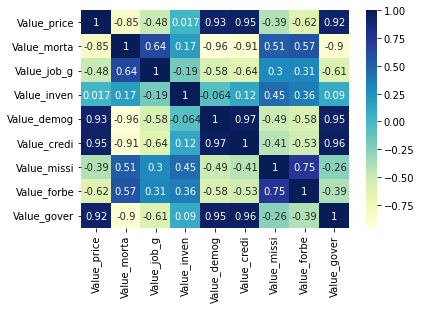

In [32]:
sn.heatmap(data.corr(), cmap="YlGnBu", annot=True)

I haven't used any ML based functions like SelectKBest or Model building. Because the amount of data is very less for performing such tasks.

The features with highest to lowest correlations is 


1.   Credit Availability
2.   Demographics
3.   Government Involvement
4.   Mortage Interest is negatively correlated. As the mortage interest increases population of people buying houses decreases 
5.   Forbearance is also negatively correlated.
6.   Job Growth is negatively correlated, which might be because, when jobs increases number of people buying houses increases and thus the cost increases.(Or thtis might be an error)
7.   Missing mortage is negatively correlated.
8.   Inventory level is least correlated, but it has positive effect.